# Name : Patel Shreni Pranav

# Data Science (sem - 7)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

C:\Users\Jatin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
img = image.load_img(r'D:\~Data Science Sem 7\CC-404 (P) Practical Based on CC-403 (Deep Learning)\Unit - 2 Data Preparation for Deep Learning\fruit_dataset\training_set\grapes\Image_1.jpg')

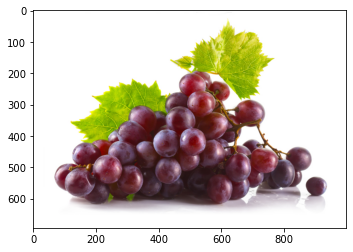

In [3]:
plt.imshow(img)

In [4]:
train_data_dir = r'D:\~Data Science Sem 7\CC-404 (P) Practical Based on CC-403 (Deep Learning)\Unit - 2 Data Preparation for Deep Learning\fruit_dataset\training_set'
test_data_dir = r'D:\~Data Science Sem 7\CC-404 (P) Practical Based on CC-403 (Deep Learning)\Unit - 2 Data Preparation for Deep Learning\fruit_dataset\test_set'

In [5]:
img_width, img_height = 150, 150
batch_size = 32
epochs = 20

In [6]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Preprocessing and data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1.0 / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=batch_size,
    class_mode='categorical')

# Preprocessing for test set
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_width, img_height), batch_size=batch_size,
    class_mode='categorical')



Found 270 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [7]:
train_generator.class_indices

{'grapes': 0, 'mango': 1, 'watermelon': 2}

In [8]:
import os
pred_list = [f"D:/~Data Science Sem 7/CC-404 (P) Practical Based on CC-403 (Deep Learning)/Unit - 2 Data Preparation for Deep Learning/fruit_dataset/validation_set/{i}" for i in os.listdir(r"D:\~Data Science Sem 7\CC-404 (P) Practical Based on CC-403 (Deep Learning)\Unit - 2 Data Preparation for Deep Learning\fruit_dataset\validation_set")]


In [10]:
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


Epoch 1/20
9/9 [==============================] - 48s 5s/step - loss: 1.4291 - accuracy: 0.3556 - val_loss: 1.0583 - val_accuracy: 0.3333
Epoch 2/20
9/9 [==============================] - 35s 4s/step - loss: 0.9907 - accuracy: 0.5185 - val_loss: 0.7903 - val_accuracy: 0.6000
Epoch 3/20
9/9 [==============================] - 35s 4s/step - loss: 0.8804 - accuracy: 0.5556 - val_loss: 0.6641 - val_accuracy: 0.7000
Epoch 4/20
9/9 [==============================] - 60s 7s/step - loss: 0.8100 - accuracy: 0.5741 - val_loss: 0.5330 - val_accuracy: 0.8000
Epoch 5/20
9/9 [==============================] - 50s 5s/step - loss: 0.6623 - accuracy: 0.6704 - val_loss: 0.4338 - val_accuracy: 0.8667
Epoch 6/20
9/9 [==============================] - 36s 4s/step - loss: 0.5797 - accuracy: 0.7444 - val_loss: 0.4039 - val_accuracy: 0.7667
Epoch 7/20
9/9 [==============================] - 35s 4s/step - loss: 0.5009 - accuracy: 0.7556 - val_loss: 0.2156 - val_accuracy: 0.9333
Epoch 8/20
9/9 [==================

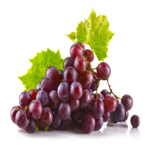

1/1 [==============================] - 0s 205ms/step
prob =  [9.9985898e-01 2.0009716e-10 1.4103524e-04]
0
This is grapes with confidence 0.9998589754104614


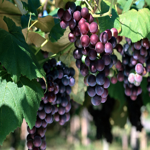

1/1 [==============================] - 0s 63ms/step
prob =  [9.9999750e-01 1.6736855e-10 2.5210516e-06]
0
This is grapes with confidence 0.9999974966049194


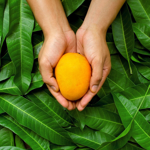

1/1 [==============================] - 0s 129ms/step
prob =  [1.0131060e-05 9.8368180e-01 1.6308088e-02]
1
This is mango with confidence 0.9836817979812622


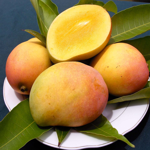

1/1 [==============================] - 0s 64ms/step
prob =  [6.0366920e-09 9.9907887e-01 9.2110265e-04]
1
This is mango with confidence 0.9990788698196411


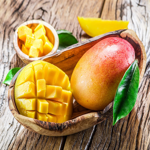

1/1 [==============================] - 0s 87ms/step
prob =  [6.6026490e-10 9.9940705e-01 5.9289980e-04]
1
This is mango with confidence 0.9994070529937744


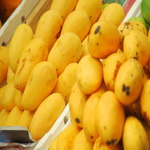

1/1 [==============================] - 0s 91ms/step
prob =  [3.7216393e-12 9.9988890e-01 1.1109499e-04]
1
This is mango with confidence 0.9998888969421387


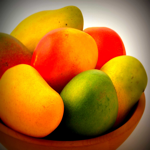

1/1 [==============================] - 0s 106ms/step
prob =  [5.8541358e-12 9.9976331e-01 2.3664540e-04]
1
This is mango with confidence 0.9997633099555969


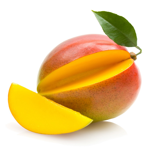

1/1 [==============================] - 0s 78ms/step
prob =  [6.2156585e-11 9.9989069e-01 1.0934080e-04]
1
This is mango with confidence 0.9998906850814819


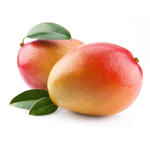

1/1 [==============================] - 0s 104ms/step
prob =  [9.3571400e-09 9.9504483e-01 4.9551777e-03]
1
This is mango with confidence 0.9950448274612427


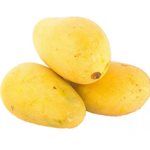

1/1 [==============================] - 0s 80ms/step
prob =  [3.7137193e-09 9.9978834e-01 2.1169473e-04]
1
This is mango with confidence 0.9997883439064026


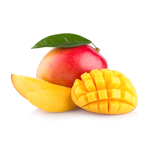

1/1 [==============================] - 0s 92ms/step
prob =  [8.6197116e-10 9.9736005e-01 2.6399926e-03]
1
This is mango with confidence 0.9973600506782532


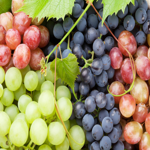

1/1 [==============================] - 0s 84ms/step
prob =  [0.7461242  0.24494809 0.00892768]
0
This is grapes with confidence 0.7461242079734802


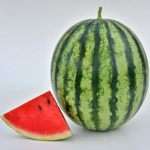

1/1 [==============================] - 0s 70ms/step
prob =  [4.8220849e-05 1.4926132e-03 9.9845922e-01]
2
This is watermelon with confidence 0.9984592199325562


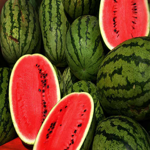

1/1 [==============================] - 0s 107ms/step
prob =  [4.9225068e-09 3.5094074e-04 9.9964905e-01]
2
This is watermelon with confidence 0.9996490478515625


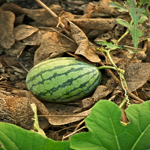

1/1 [==============================] - 0s 78ms/step
prob =  [0.00705436 0.01651266 0.976433  ]
2
This is watermelon with confidence 0.9764329791069031


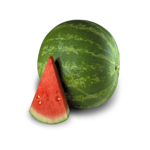

1/1 [==============================] - 0s 63ms/step
prob =  [5.9564863e-05 2.4270758e-03 9.9751341e-01]
2
This is watermelon with confidence 0.9975134134292603


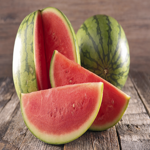

1/1 [==============================] - 0s 63ms/step
prob =  [8.4036662e-09 1.5342218e-04 9.9984658e-01]
2
This is watermelon with confidence 0.9998465776443481


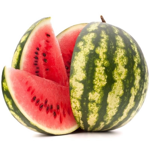

1/1 [==============================] - 0s 95ms/step
prob =  [2.6077808e-08 1.5171481e-03 9.9848288e-01]
2
This is watermelon with confidence 0.998482882976532


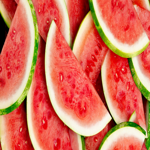

1/1 [==============================] - 0s 70ms/step
prob =  [1.4460231e-13 1.1701012e-05 9.9998832e-01]
2
This is watermelon with confidence 0.999988317489624


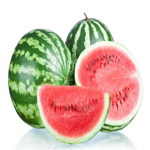

1/1 [==============================] - 0s 69ms/step
prob =  [5.822734e-10 1.115756e-04 9.998884e-01]
2
This is watermelon with confidence 0.9998884201049805


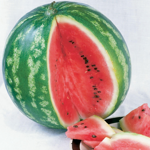

1/1 [==============================] - 0s 63ms/step
prob =  [2.5498652e-09 7.9737387e-05 9.9992025e-01]
2
This is watermelon with confidence 0.9999202489852905


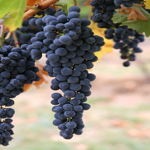

1/1 [==============================] - 0s 52ms/step
prob =  [9.999989e-01 1.703292e-08 1.090058e-06]
0
This is grapes with confidence 0.999998927116394


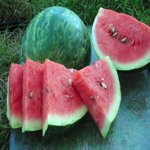

1/1 [==============================] - 0s 47ms/step
prob =  [2.1284177e-06 1.6430811e-03 9.9835473e-01]
2
This is watermelon with confidence 0.9983547329902649


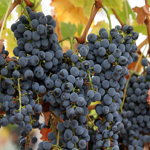

1/1 [==============================] - 0s 64ms/step
prob =  [9.8933303e-01 3.4357913e-07 1.0666658e-02]
0
This is grapes with confidence 0.9893330335617065


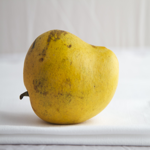

1/1 [==============================] - 0s 48ms/step
prob =  [5.4158231e-06 9.9438417e-01 5.6103272e-03]
1
This is mango with confidence 0.9943841695785522


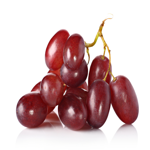

1/1 [==============================] - 0s 48ms/step
prob =  [9.9620950e-01 6.9555405e-08 3.7903548e-03]
0
This is grapes with confidence 0.9962095022201538


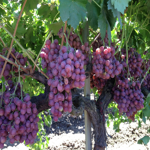

1/1 [==============================] - 0s 63ms/step
prob =  [9.9846196e-01 6.8655898e-10 1.5380211e-03]
0
This is grapes with confidence 0.9984619617462158


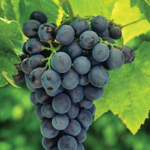

1/1 [==============================] - 0s 49ms/step
prob =  [9.9548423e-01 2.6941262e-07 4.5155734e-03]
0
This is grapes with confidence 0.9954842329025269


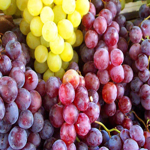

1/1 [==============================] - 0s 54ms/step
prob =  [9.9726462e-01 1.2527468e-06 2.7340506e-03]
0
This is grapes with confidence 0.9972646236419678


In [11]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

threshold = 0.5

# Define class labels
class_labels = ['grapes', 'mango', 'watermelon'] 

# Data augmentation and rescaling
img_gen = ImageDataGenerator(rescale=1./255)

for i in range(len(pred_list)):
    img = Image.open(pred_list[i])
    img = img.resize((150, 150))
    display(img)
    img_arr = np.array(img)
    img_arr = img_arr[np.newaxis, :]
    img_arr = img_arr.astype("float")
    img_arr = img_gen.standardize(img_arr)
    probabilities = model.predict(img_arr)[0]
    print("prob = ",probabilities)
    
    # Assign the class label with the highest probability
    predicted_class_idx = np.argmax(probabilities)
    predicted_class_label = class_labels[predicted_class_idx]
    print(predicted_class_idx)

    
    if (probabilities[predicted_class_idx] > threshold).any():
        print(f"This is {predicted_class_label} with confidence {probabilities[predicted_class_idx]:}")
    else:
        print("Uncertain prediction.")
    
    print("==========================================")
